In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression 

In [2]:
antapani = pd.read_csv('Clean Antapani.csv')
arcamanik = pd.read_csv('Clean Arcamanik.csv')
buahbatu = pd.read_csv('Clean Buahbatu.csv')

In [121]:
antapani.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,4.0,3.0,131.0,108.0,2500000100,2500.0
1,4.0,3.0,131.0,108.0,2500000000,2500.0
2,3.0,3.0,130.0,108.0,2500000000,2500.0
3,6.0,3.0,85.0,108.0,890000000,890.0
4,3.0,2.0,106.0,96.0,1599900000,1599.9


In [122]:
arcamanik.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,3.0,2.0,240.0,331.0,2500000000,2500.0
1,4.0,2.0,220.0,231.0,2500000000,2500.0
2,2.0,1.0,61.0,89.0,350000000,350.0
3,2.0,1.0,45.0,100.0,575000000,575.0
4,4.0,3.0,137.0,114.0,2400000000,2400.0


In [123]:
buahbatu.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,4,3,168,264.0,4500000000,4500.0
1,2,1,29,82.0,810000000,810.0
2,10,3,146,70.0,2300000000,2300.0
3,2,2,50,72.0,693504000,693.5
4,2,2,50,72.0,693504000,693.5


In [124]:
antapani.describe()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
count,973.000000,973.000000,973.000000,973.000000,9.730000e+02,973.000000
mean,3.476876,2.331963,127.924974,128.053443,1.424531e+09,1424.531490
std,1.387306,1.014187,73.323593,58.460894,7.119371e+08,711.937107
min,1.000000,1.000000,2.000000,37.000000,1.450000e+08,145.000000
25%,3.000000,2.000000,80.000000,90.000000,9.250000e+08,925.000000
50%,3.000000,2.000000,110.000000,109.000000,1.299000e+09,1299.000000
75%,4.000000,3.000000,170.000000,150.000000,1.750000e+09,1750.000000
max,14.000000,9.000000,1001.000000,400.000000,3.500000e+09,3500.000000


In [3]:
from sklearn.model_selection import train_test_split

antapani_train, antapani_test = train_test_split(antapani, test_size=0.2)
arcamanik_train, arcamanik_test = train_test_split(arcamanik, test_size=0.2)
buahbatu_train, buahbatu_test = train_test_split(buahbatu, test_size=0.2)

In [4]:
x = ['Kamar Tidur','Kamar Mandi', 'Luas Bangunan', 'Luas Tanah']
y = ['Harga (Juta Rupiah)']

antapani_y = antapani_train[y]
antapani_x = antapani_train[x]
arcamanik_y = arcamanik_train[y]
arcamanik_x = arcamanik_train[x]
buahbatu_y = buahbatu_train[y]
buahbatu_x = buahbatu_train[x]

In [5]:
lr_antapani = LinearRegression()
lr_arcamanik = LinearRegression()
lr_buahbatu = LinearRegression()

In [6]:
lr_antapani.fit(antapani_x, antapani_y)
lr_arcamanik.fit(arcamanik_x, arcamanik_y)
lr_buahbatu.fit(buahbatu_x, buahbatu_y)

LinearRegression()

In [7]:
df = pd.concat([pd.DataFrame(antapani_x.columns),
                 pd.DataFrame(np.transpose(lr_antapani.coef_)),
                 pd.DataFrame(np.transpose(lr_arcamanik.coef_)),
                 pd.DataFrame(np.transpose(lr_buahbatu.coef_))], axis = 1)

df.columns = ['Features', 'Antapani', 'Arcamanik', 'Buah Batu']
df

,Features,Antapani,Arcamanik,Buah Batu
0,Kamar Tidur,0.609142,-18.206324,-24.475642
1,Kamar Mandi,164.840030,138.775483,66.020486
2,Luas Bangunan,2.024131,3.092983,2.555794
3,Luas Tanah,5.913973,3.701597,7.319618


In [8]:
# Transpose the DataFrame
df_transposed = df.transpose()

# Set the first row as the column names and remove the old 'Features' column
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop('Features')

# Reset the index if you want to turn the old column names into a regular column
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Location'})
df_transposed


Features,Location,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah
0,Antapani,0.609142,164.84003,2.024131,5.913973
1,Arcamanik,-18.206324,138.775483,3.092983,3.701597
2,Buah Batu,-24.475642,66.020486,2.555794,7.319618


In [9]:
score = [lr_antapani.score(antapani_x,antapani_y), lr_arcamanik.score(arcamanik_x,arcamanik_y), lr_buahbatu.score(buahbatu_x,buahbatu_y)]
location = ['Antapani', 'Arcamanik','Buah Batu']

# dictionary of lists 
dict = {'Location': location, 'R2': score} 
   
score_df = pd.DataFrame(dict)
   
score_df

,Location,R2
0,Antapani,0.608102
1,Arcamanik,0.665931
2,Buah Batu,0.561615


In [10]:
def adj_r2(x,y):
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [11]:
antapani_adj = adj_r2(antapani_x, antapani_y)
arcamanik_adj= adj_r2(arcamanik_x, arcamanik_y)
buahbatu_adj= adj_r2(buahbatu_x, buahbatu_y)
adjusted_r2 = [antapani_adj, arcamanik_adj, buahbatu_adj]
score_df['Adj. R2'] = adjusted_r2

In [12]:
score_df

,Location,R2,Adj. R2
0,Antapani,0.608102,0.606074
1,Arcamanik,0.665931,0.662928
2,Buah Batu,0.561615,0.557639


In [13]:
antapani_testing = antapani_test[x]
arcamanik_testing = arcamanik_test[x]
buahbatu_testing = buahbatu_test[x]

In [14]:
antapani_prediction = lr_antapani.predict(antapani_testing)
arcamanik_prediction = lr_arcamanik.predict(arcamanik_testing)
buahbatu_prediction = lr_buahbatu.predict(buahbatu_testing)

In [15]:
antapani_test['Prediksi'] = antapani_prediction
arcamanik_test['Prediksi'] = arcamanik_prediction
buahbatu_test['Prediksi'] = buahbatu_prediction

In [16]:
antapani_test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi
165,3.0,2.0,70.0,104.0,815000000,815.0,1104.725473
62,3.0,1.0,42.0,93.0,291100000,291.1,818.156085
582,5.0,3.0,215.0,187.0,1450000000,1450.0,2055.142463
450,3.0,2.0,60.0,100.0,950000000,950.0,1060.828275
324,4.0,2.0,100.0,98.0,990000000,990.0,1130.574700


In [17]:
arcamanik_test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi
335,3.0,3.0,100.0,100.0,1200000000,1200.0,1159.020003
431,2.0,2.0,45.0,61.0,479000000,479.0,723.974502
495,3.0,2.0,220.0,150.0,1700000000,1700.0,1576.482316
385,3.0,3.0,100.0,100.0,1150000000,1150.0,1159.020003
216,3.0,2.0,350.0,400.0,2850000000,2850.0,2903.969335


In [18]:
buahbatu_test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi
146,4,3,100,120.0,2450000000,2450.0,1526.714338
290,4,4,127,126.0,2650000000,2650.0,1705.658965
289,2,1,36,71.0,550000000,550.0,921.392557
502,7,4,133,302.0,3800000000,3800.0,2935.819606
357,3,2,110,72.0,475000000,475.0,1159.385758


In [19]:
antapani_test['Diff'] = antapani_test['Harga (Juta Rupiah)']-antapani_test['Prediksi']
antapani_test['Diff %'] = ((antapani_test['Harga (Juta Rupiah)']-antapani_test['Prediksi'])/antapani_test['Harga (Juta Rupiah)'])*100
antapani_test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi,Diff,Diff %
165,3.0,2.0,70.0,104.0,815000000,815.0,1104.725473,-289.725473,-35.549138
62,3.0,1.0,42.0,93.0,291100000,291.1,818.156085,-527.056085,-181.056711
582,5.0,3.0,215.0,187.0,1450000000,1450.0,2055.142463,-605.142463,-41.733963
450,3.0,2.0,60.0,100.0,950000000,950.0,1060.828275,-110.828275,-11.666134
324,4.0,2.0,100.0,98.0,990000000,990.0,1130.574700,-140.574700,-14.199465


In [20]:
arcamanik_test['Diff'] = arcamanik_test['Harga (Juta Rupiah)']-arcamanik_test['Prediksi']
arcamanik_test['Diff %'] = ((arcamanik_test['Harga (Juta Rupiah)']-arcamanik_test['Prediksi'])/arcamanik_test['Harga (Juta Rupiah)'])*100
arcamanik_test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi,Diff,Diff %
335,3.0,3.0,100.0,100.0,1200000000,1200.0,1159.020003,40.979997,3.415000
431,2.0,2.0,45.0,61.0,479000000,479.0,723.974502,-244.974502,-51.142902
495,3.0,2.0,220.0,150.0,1700000000,1700.0,1576.482316,123.517684,7.265746
385,3.0,3.0,100.0,100.0,1150000000,1150.0,1159.020003,-9.020003,-0.784348
216,3.0,2.0,350.0,400.0,2850000000,2850.0,2903.969335,-53.969335,-1.893661


In [21]:
buahbatu_test['Diff'] = buahbatu_test['Harga (Juta Rupiah)']-buahbatu_test['Prediksi']
buahbatu_test['Diff %'] = ((buahbatu_test['Harga (Juta Rupiah)']-buahbatu_test['Prediksi'])/buahbatu_test['Harga (Juta Rupiah)'])*100
buahbatu_test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi,Diff,Diff %
146,4,3,100,120.0,2450000000,2450.0,1526.714338,923.285662,37.685129
290,4,4,127,126.0,2650000000,2650.0,1705.658965,944.341035,35.635511
289,2,1,36,71.0,550000000,550.0,921.392557,-371.392557,-67.525919
502,7,4,133,302.0,3800000000,3800.0,2935.819606,864.180394,22.741589
357,3,2,110,72.0,475000000,475.0,1159.385758,-684.385758,-144.081212


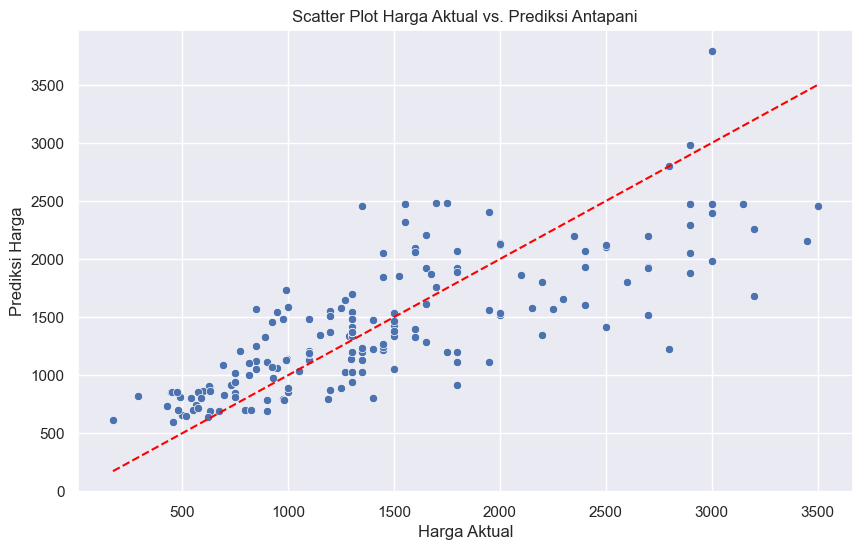

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Harga (Juta Rupiah)', y='Prediksi', data=antapani_test)
plt.plot([antapani_test['Harga (Juta Rupiah)'].min(), antapani_test['Harga (Juta Rupiah)'].max()],
         [antapani_test['Harga (Juta Rupiah)'].min(), antapani_test['Harga (Juta Rupiah)'].max()],
         linestyle='--', color='red')  # Garis referensi
plt.xlabel('Harga Aktual')
plt.ylabel('Prediksi Harga')
plt.title('Scatter Plot Harga Aktual vs. Prediksi Antapani')
plt.show()

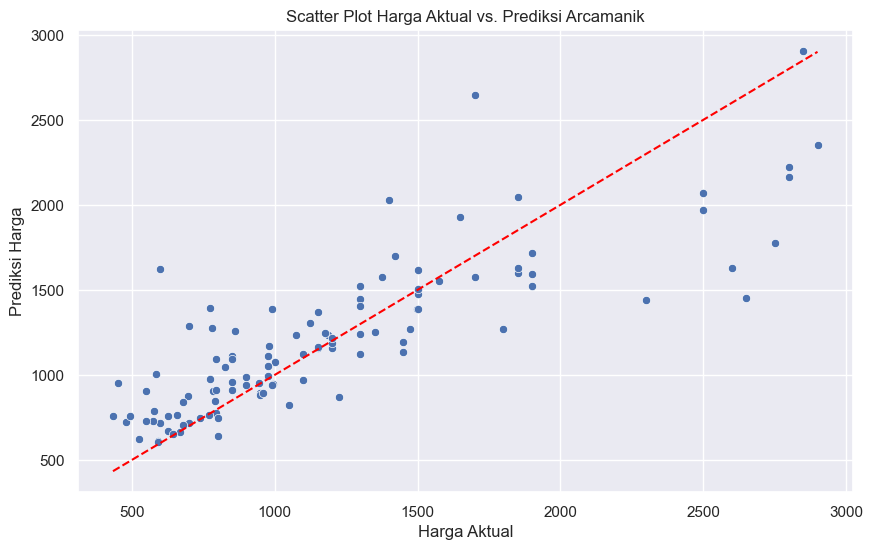

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Harga (Juta Rupiah)', y='Prediksi', data=arcamanik_test)
plt.plot([arcamanik_test['Harga (Juta Rupiah)'].min(), arcamanik_test['Harga (Juta Rupiah)'].max()],
         [arcamanik_test['Harga (Juta Rupiah)'].min(), arcamanik_test['Harga (Juta Rupiah)'].max()],
         linestyle='--', color='red')  # Garis referensi
plt.xlabel('Harga Aktual')
plt.ylabel('Prediksi Harga')
plt.title('Scatter Plot Harga Aktual vs. Prediksi Arcamanik')
plt.show()

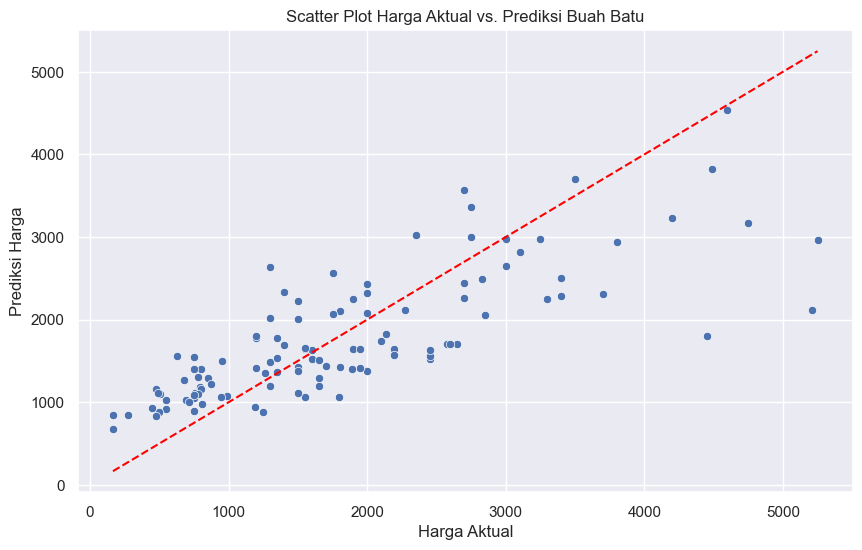

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Harga (Juta Rupiah)', y='Prediksi', data=buahbatu_test)
plt.plot([buahbatu_test['Harga (Juta Rupiah)'].min(), buahbatu_test['Harga (Juta Rupiah)'].max()],
         [buahbatu_test['Harga (Juta Rupiah)'].min(), buahbatu_test['Harga (Juta Rupiah)'].max()],
         linestyle='--', color='red')  # Garis referensi
plt.xlabel('Harga Aktual')
plt.ylabel('Prediksi Harga')
plt.title('Scatter Plot Harga Aktual vs. Prediksi Buah Batu')
plt.show()

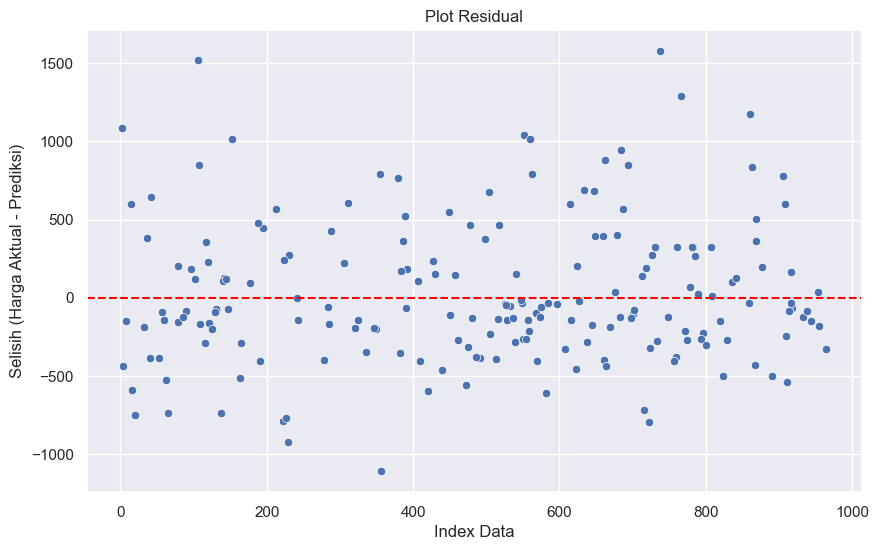

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=antapani_test.index, y='Diff', data=antapani_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index Data')
plt.ylabel('Selisih (Harga Aktual - Prediksi)')
plt.title('Plot Residual')
plt.show()

In [32]:
print("Statistik Deskriptif Harga Rumah di Antapani:")
print(antapani_test['Diff %'].describe())

#print("\nRata-Rata Selisih:")
#print(antapani_test['Diff'].mean())

#print("\nStandar Deviasi Selisih:")
#print(antapani_test['Diff'].std())


Statistik Deskriptif Harga Rumah di Antapani:
count    195.000000
mean      -9.256665
std       37.600718
min     -251.723956
25%      -29.276900
50%       -5.309527
75%       17.721187
max       56.316977
Name: Diff %, dtype: float64


In [33]:
print("Statistik Deskriptif Harga Rumah di Antapani:")
print(arcamanik_test['Diff %'].describe())

Statistik Deskriptif Harga Rumah di Antapani:
count    113.000000
mean     -10.411463
std       30.827855
min     -170.420068
25%      -19.245901
50%       -3.474845
75%        7.028759
max       45.247928
Name: Diff %, dtype: float64


In [34]:
print("Statistik Deskriptif Harga Rumah di Antapani:")
print(buahbatu_test['Diff %'].describe())

Statistik Deskriptif Harga Rumah di Antapani:
count    112.000000
mean     -22.377260
std       66.992221
min     -412.058817
25%      -46.221359
50%       -6.677522
75%       21.379137
max       59.630532
Name: Diff %, dtype: float64


In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
antapani_mae = mean_absolute_error(antapani_test['Harga (Juta Rupiah)'], antapani_test['Prediksi'])
arcamanik_mae = mean_absolute_error(arcamanik_test['Harga (Juta Rupiah)'], arcamanik_test['Prediksi'])
buahbatu_mae = mean_absolute_error(buahbatu_test['Harga (Juta Rupiah)'], buahbatu_test['Prediksi'])
mae = [antapani_mae, arcamanik_mae,buahbatu_mae]

# Calculate R-squared
antapani_r = r2_score(antapani_test['Harga (Juta Rupiah)'], antapani_test['Prediksi'])
arcamanik_r = r2_score(arcamanik_test['Harga (Juta Rupiah)'], arcamanik_test['Prediksi'])
buahbatu_r = r2_score(buahbatu_test['Harga (Juta Rupiah)'], buahbatu_test['Prediksi'])
r_squared = [antapani_r,arcamanik_r,buahbatu_r]

# dictionary of lists 
valuation = {'Location': location, 'MAE': mae, 'R²': r_squared} 
   
valuation_df = pd.DataFrame(valuation)
   
valuation_df



,Location,MAE,R²
0,Antapani,352.418353,0.593905
1,Arcamanik,225.364470,0.683920
2,Buah Batu,540.099779,0.598801
